In [16]:
import numpy as np
from scipy.signal import convolve2d, fftconvolve
from datetime import datetime
import random

# create random data
# ouput will be sotred  in a pre-allocated array O, dimension A
def makeData (N=256, numimg=2, M=8, numfilt=3, seed=42):
    np.random.seed(seed)
    I = np.random.rand(N, N, numimg)
    F = np.random.rand(M, M, numfilt)
    O = np.zeros((N, N, numimg, numfilt))
    return I, F, O

# convolve each image with each filter
def c2d (I, F, O):
    for i in range(I.shape[2]):
        for j in range(F.shape[2]):
            O[:,:,i,j] = convolve2d(I[:,:,i], F[:,:,j], mode='same')
    return O

# convolve each image with each filter
def c2dfft (I, F, O):
    for i in range(I.shape[2]):
        for j in range(F.shape[2]):
            O[:,:,i,j] = fftconvolve(I[:,:,i], F[:,:,j], mode='same')
    return O

# compare the two methods
def compare (I, F, O):
    O1 = np.zeros(O.shape)
    O2 = np.zeros(O.shape)
    t1 = datetime.now()
    O1 = c2d(I, F, O1)
    t2 = datetime.now()
    O2 = c2dfft(I, F, O2)
    t3 = datetime.now()
    print('conv2d time: ', t2-t1)
    print('fft2d time: ', t3-t2)
    print('max error: ', np.max(np.abs(O1-O2)))

# run the code
I, F, O = makeData()
compare(I, F, O)

conv2d time:  0:00:00.037364
fft2d time:  0:00:00.005871
max error:  2.1316282072803006e-14


In [17]:
# experiment the time execution of the two methods repeating the experiment 20 times
img_size = [256, 512, 1024]
filt_size = [8, 16, 32]

def experiment(img_size, filter_size, num_iter=20):

    random.seed(119)
    random_seed = random.sample(range(200), num_iter)

    for i in range(len(img_size)):
        for j in range(len(filter_size)):
            for k in range(num_iter):
                I, F, O = makeData(img_size[i], 2, filter_size[j], 3, random_seed[k])
                compare(I, F, O)

experiment(img_size, filt_size)

conv2d time:  0:00:00.049101
fft2d time:  0:00:00.006505
max error:  3.197442310920451e-14
conv2d time:  0:00:00.040876
fft2d time:  0:00:00.005811
max error:  2.4868995751603507e-14
conv2d time:  0:00:00.036843
fft2d time:  0:00:00.005627
max error:  2.4868995751603507e-14
conv2d time:  0:00:00.043618
fft2d time:  0:00:00.006183
max error:  2.4868995751603507e-14
conv2d time:  0:00:00.038348
fft2d time:  0:00:00.005338
max error:  2.842170943040401e-14
conv2d time:  0:00:00.037486
fft2d time:  0:00:00.005823
max error:  2.842170943040401e-14
conv2d time:  0:00:00.036768
fft2d time:  0:00:00.005613
max error:  2.842170943040401e-14
conv2d time:  0:00:00.037189
fft2d time:  0:00:00.005451
max error:  2.842170943040401e-14
conv2d time:  0:00:00.037641
fft2d time:  0:00:00.006009
max error:  2.3092638912203256e-14
conv2d time:  0:00:00.037297
fft2d time:  0:00:00.005521
max error:  2.842170943040401e-14
conv2d time:  0:00:00.039010
fft2d time:  0:00:00.005533
max error:  2.131628207280300

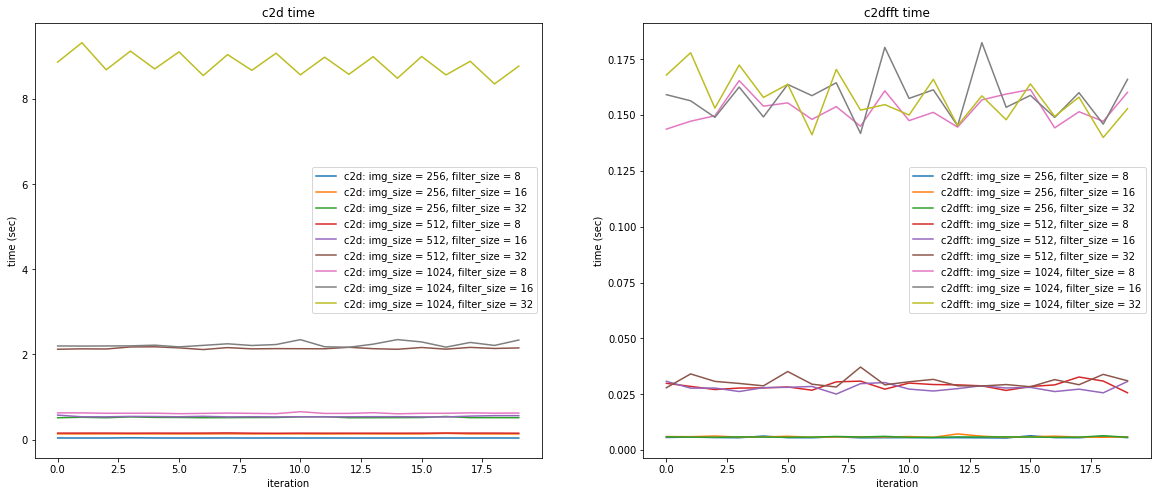

In [18]:
# plot the results
import matplotlib.pyplot as plt

def plot_results(img_size, filter_size, num_iter=20):

    random.seed(119)
    random_seed = random.sample(range(200), num_iter)

    c2d_time = np.zeros((len(img_size), len(filter_size), num_iter))
    c2dfft_time = np.zeros((len(img_size), len(filter_size), num_iter))

    for i in range(len(img_size)):
        for j in range(len(filter_size)):
            for k in range(num_iter):
                I, F, O = makeData(img_size[i], 2, filter_size[j], 3, random_seed[k])
                O1 = np.zeros(O.shape)
                O2 = np.zeros(O.shape)
                t1 = datetime.now()
                O1 = c2d(I, F, O1)
                t2 = datetime.now()
                O2 = c2dfft(I, F, O2)
                t3 = datetime.now()
                c2d_time[i, j, k] = (t2-t1).total_seconds()
                c2dfft_time[i, j, k] = (t3-t2).total_seconds()

    fig, ax = plt.subplots(1, 2, figsize=(20, 8))

    for i in range(len(img_size)):
        for j in range(len(filter_size)):
            ax[0].plot(c2d_time[i, j, :], label='c2d: img_size = ' + str(img_size[i]) + ', filter_size = ' + str(filter_size[j]))
            ax[1].plot(c2dfft_time[i, j, :], label='c2dfft: img_size = ' + str(img_size[i]) + ', filter_size = ' + str(filter_size[j]))

    ax[0].set_title('c2d time')
    ax[0].set_xlabel('iteration')
    ax[0].set_ylabel('time (sec)')
    ax[0].legend()
    ax[1].set_title('c2dfft time')
    ax[1].set_xlabel('iteration')
    ax[1].set_ylabel('time (sec)')
    ax[1].legend()

    plt.show()

plot_results(img_size, filt_size)